# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [304]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [305]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.shape

spaceship.dropna(inplace=True)
spaceship.reset_index(inplace=True, drop=True)

Now perform the same as before:
- Feature Scaling
- Feature Selection


In [306]:
# 1. Feature selection

spaceship.select_dtypes(include=['number', 'bool']).corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553
RoomService,0.074783,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291
FoodCourt,0.135844,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025
ShoppingMall,0.042314,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602
Spa,0.123820,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854
VRDeck,0.105031,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950
Transported,-0.082553,-0.247291,0.055025,0.011602,-0.219854,-0.207950,1.000000


In [307]:
#your code here

features = spaceship.select_dtypes(include='number')    # Mejor manual

target = spaceship['Transported']       # Estamos haciendo una clasificación


In [308]:
features.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


**Perform Train Test Split**

In [309]:
#your code here

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)     

**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [310]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                                n_estimators=100,               # 100 arboles
                                max_samples=1000                # Del 80% del X_train va a coger paquetes de 1000
                                )


In [311]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

In [312]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.83      0.74      0.78       653
        True       0.77      0.85      0.81       669

    accuracy                           0.80      1322
   macro avg       0.80      0.79      0.79      1322
weighted avg       0.80      0.80      0.79      1322



In [313]:
# 2. Repetición con Normalization

from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

X_train_norm = normalizer.fit_transform(X_train)        

X_test_norm = normalizer.transform(X_test)

In [314]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)        # Vuelvo a dar formato de df
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [315]:
bagging_clf_norm = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                                n_estimators=100, 
                                bootstrap=True,         # Esto es para que sea bagging o pasting (no es obligatorio especificar)             
                                max_samples=1000        # Toma 1000 muestras para cada uno (si pusiera 0.X cogeria el X0% de las muestras)             
                                )

In [316]:
bagging_clf_norm.fit(X_train_norm, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

In [317]:
# Make predictions
y_pred_norm = bagging_clf_norm.predict(X_test_norm)

# Generate the classification report
report = classification_report(y_test, y_pred_norm)
print(report)

              precision    recall  f1-score   support

       False       0.83      0.74      0.78       653
        True       0.77      0.85      0.81       669

    accuracy                           0.80      1322
   macro avg       0.80      0.80      0.80      1322
weighted avg       0.80      0.80      0.80      1322



In [318]:
# 3. Repetición con Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()       
X_train_scaling = scaler.fit_transform(X_train)
X_train_scaling = pd.DataFrame(X_train_scaling, columns = X_train.columns)

X_test_scaling = scaler.transform(X_test)
X_test_scaling = pd.DataFrame(X_test_scaling, columns = X_test.columns)

In [319]:
bagging_clf_scaling = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                                n_estimators=100,               
                                max_samples=1000                
                                )

bagging_clf_scaling.fit(X_train_scaling, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

In [320]:
# Make predictions
y_pred_scaling = bagging_clf_scaling.predict(X_test_scaling)

# Generate the classification report
report = classification_report(y_test, y_pred_scaling)
print(report)

              precision    recall  f1-score   support

       False       0.83      0.74      0.78       653
        True       0.77      0.85      0.81       669

    accuracy                           0.80      1322
   macro avg       0.80      0.80      0.79      1322
weighted avg       0.80      0.80      0.80      1322



In [321]:
### EN VISTA DE LAS 3 FORMAS DE REALIZAR ESTA PREDICCIÓN, LA MEJOR MANERA, ATENDIENDO AL f1-score (POR UNA LIGERA DIFERENCIA) ES LA NORMALIZACIÓN

- Random Forests

In [322]:
#your code here
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, accuracy_score
# Create and train the Random Forest regressor

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_norm, y_train)

# Make predictions
y_pred_norm = rf_classifier.predict(X_test_norm)

# Evaluate the model
report = classification_report(y_test, y_pred_norm)              
print(report)

accuracy = accuracy_score(y_test, y_pred_norm)
print(f"Accuracy: {accuracy}")


              precision    recall  f1-score   support

       False       0.83      0.74      0.78       653
        True       0.77      0.85      0.81       669

    accuracy                           0.79      1322
   macro avg       0.80      0.79      0.79      1322
weighted avg       0.80      0.79      0.79      1322

Accuracy: 0.7934947049924357


- Gradient Boosting

In [323]:
#your code here
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingClassifier

gb_clas = GradientBoostingClassifier(max_depth=20,
                                   n_estimators=100)

gb_clas.fit(X_train_norm, y_train)

pred_gb_norm = gb_clas.predict(X_test_norm)

report = classification_report(y_test, y_pred_norm)              
print(report)

              precision    recall  f1-score   support

       False       0.83      0.74      0.78       653
        True       0.77      0.85      0.81       669

    accuracy                           0.79      1322
   macro avg       0.80      0.79      0.79      1322
weighted avg       0.80      0.79      0.79      1322



- Adaptive Boosting (AdaBoost)

In [324]:
#your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clas = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=200)

ada_clas.fit(X_train_norm, y_train)

report = classification_report(y_test, y_pred_norm)              
print(report)

c:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

       False       0.83      0.74      0.78       653
        True       0.77      0.85      0.81       669

    accuracy                           0.79      1322
   macro avg       0.80      0.79      0.79      1322
weighted avg       0.80      0.79      0.79      1322



## Which model is the best and why?

### The best model is bagging with scaling (very close to the others) because its f1-score is 0.80, and for the rest 0.79

In [325]:
# Una vez que tenemos el mejor modelo, podriamos predecir los resultados de la Spaceship.

predictions = bagging_clf_norm.predict(features)


predictions = pd.DataFrame(predictions, columns=['Resuls_predicted'])

In [326]:
spaceship["predictions"] = predictions  

In [327]:
spaceship["Resta"] = spaceship["Transported"].astype(int) - spaceship["predictions"].astype(int)

In [328]:
spaceship["Resta"].value_counts()[0] / spaceship["Resta"].value_counts().sum()

0.7275204359673024

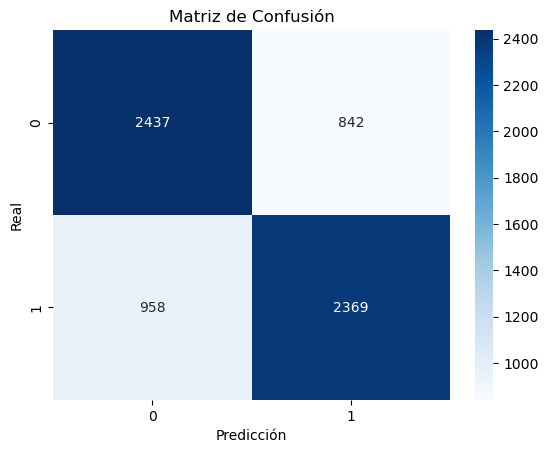

In [329]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(spaceship["Transported"], spaceship["predictions"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


# ESTO ES MUY ÚTIL PERO SOLO EN CLASIFICACIÓN

In [330]:
# La razón de que que el f1-score sea 0.80 pero tenga un % de aciertos de apenas el 50% es porque 